<h1 style="color:rgb(0,120,170)">Assignment 6: Logistic Regression</h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that all cells are tagged such that the unittest routine can recognise them. Before you sumbit your solution, make sure every cell has its (correct) tag!

You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt

<h2 style="color:rgb(210,90,80)">Task 1:</h2>

The goal of this exercise is to implement logistic regression from scratch using only numpy. Start with the following tasks:

* Implement the formula for the gradient computed in the lecture. In particular you should implement a function 
`logistic_gradient(w, x, y)` that takes a parameter vector
$\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector
$\mathbf{y}$ and returns the gradient $\frac{\partial L}{\partial
\mathbf{w}}$, where $L$ is the negative log-likelihood for the Bernoulli distribution, i.e. the cross-entropy loss.

* Implement a function `cost(w, x, y)`, that takes the same parameters but returns the cross-entropy loss.

* Test whether the gradient calculated by `logistic_gradient(w, x, y)` is correct via Gradient Checking. To do so, implement
a function `numerical_gradient(w, x, y)` that takes the same parameters
as `logistic_gradient`, but calculates the gradient numerically via the central difference quotient, using $\epsilon = 10^{-4}$ as suggested in the lecture slides.

* Implement the function `generate_random(nr_samples, nr_features)` that generates a random data matrix consisting of 5 data points with 10 features drawn from a standard normal distribution as well as corresponding random binary labels and a random weight vector, whose entries again stem from the standard normal distribution.  Hint: to generate the distributions use `np.random.normal` and `np.random.randint`.

* Implement the function `comparison(grad_a,grad_n)` that takes the analytical and the numerical gradient as inputs respectively. The function should check whether the two vectors deviate more than $\epsilon = 10^{-7}$ or not from each other (they shouldn't ;) )


<h3 style="color:rgb(210,90,80)">Code 1.1 (5 points):</h3>

In [2]:
"""
Function that computes the logistic gradient
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output gradient, np array, gradient vector
"""
def logistic_gradient(w, x, y):
    gradient = np.zeros(len(w))
    for i in range(0,len(x)):
        sigma = 1/(1+np.exp(1)**-(np.transpose(w)@x[i]))
        gradient += (sigma-y[i])*x[i]
    
    return gradient

<h3 style="color:rgb(210,90,80)">Code 1.2 (5 points):</h3>

In [3]:
"""
Function that computes the cross-entropy loss
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output loss, float, cross-entropy loss
"""
def cost(w, x, y):
    loss = 0
    for i in range(len(x)):
        sigma = 1/(1+np.exp(1)**-(np.transpose(w)@x[i]))
        loss+= -(y[i]*np.log(sigma)+(1-y[i])*np.log(1-sigma))
    return loss

<h3 style="color:rgb(210,90,80)">Code 1.3 (10 points):</h3>

In [4]:
"""
Function that computes the numerical gradient
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output dw, np array, numerical gradient
"""
def numerical_gradient(w, x, y):
    epsilon = 10**-4
    dw=np.zeros(len(w))
    
    for i in range(len(w)):
        e =np.zeros(len(w))
        e[i]=1
        dw[i]=(cost(w +epsilon*e ,x,y)-cost(w -epsilon*e ,x,y))/(2*epsilon)
    
    return dw


<h3 style="color:rgb(210,90,80)">Code 1.4 (10 points):</h3>

In [5]:
"""
Function that generates a random matrix X and the random vectors y and weights
@param nr_samples, int, the number of samples you should generate
@param nr_features, int, the number of feature each sample has

@output X_random, np array, random samples
@output y_random, np array, random targets
@output w_random, np array, random weights
"""
def generate_random(nr_samples, nr_features):
    
    X_random = np.random.normal(size = (nr_samples,nr_features))
    y_random = np.random.randint(low = 0, high = 2, size = nr_samples)
    w_random = np.random.normal(size = nr_features)
    
    return X_random, y_random, w_random

<h3 style="color:rgb(210,90,80)">Code 1.5 (10 points):</h3>

In [6]:
"""
Function that compares two array 
@param grad_a, np array, the analytical gradient
@param grad_n, np array, the numberical gradient

@output close, bool , True if the arrays are similar, False if they are not
"""
def comparison(grad_a,grad_n):
    epsilon= 10**-7
    close = True
    for i in range(len(grad_a)):
        if(abs(grad_a[i] - grad_n[i])> epsilon):
            close = False
            break
    
    
    return close

In [7]:
#Nothing to do here, if you did everything correctly you can just run this code and should see the correct results
n = 5
d = 10
X_random, y_random, w_random = generate_random(n,10)
analytical_gradient = logistic_gradient(w_random,X_random,y_random)
num_gradient = numerical_gradient(w_random,X_random,y_random)
comparison_result = comparison(analytical_gradient, num_gradient)
print("X =",X_random,"\n")
print("y =",y_random,"\n")
print("w = ",w_random,"\n")
print("Logistic gradient:\n",analytical_gradient,"\n")
print("Numerical gradient:\n", num_gradient, "\n")
print("Vectors within absolute tolerance of 10^-7: ",comparison_result)

X = [[-0.975014    0.92682741 -2.07943619  1.12842773 -0.33651889 -0.88294476
  -1.89664968  1.34839632  0.61674896 -0.39616079]
 [ 0.69669306  1.17299119 -0.21770395 -0.06666636  0.49600733 -1.19638884
  -0.15388118 -1.19384995 -0.17858453  0.83421804]
 [-2.09902122  1.17413432  0.48711836 -0.45661962  1.10348652 -1.31388123
  -0.66470668  0.4423376   0.93561054 -0.59263824]
 [ 0.64762801 -1.0257567  -0.74576592 -0.1275427   0.14406387 -0.34763512
  -0.3109441  -0.31745345  0.0402636   0.05491517]
 [ 0.65500475  0.18433031 -2.08980014 -0.92623512  0.7023048   1.04701228
   0.26216994 -2.03323372 -1.71870717 -0.59526048]] 

y = [1 0 1 1 0] 

w =  [-1.04995138 -0.80130059  0.16095744  0.23910892  1.04386593 -0.34564656
 -1.1935171   0.57020776 -0.31542168 -0.00204872] 

Logistic gradient:
 [ 0.08706785  0.614409    0.06780942 -0.12111818  0.12900379  0.07349477
  0.22682495 -0.4731848  -0.32407944  0.12711172] 

Numerical gradient:
 [ 0.08706785  0.614409    0.06780942 -0.12111818  0.12

Next we intend to apply logistic regression on a real data set.

* Implement a function `fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=1e5)` that uses Logistic Regression with Gradient Descent to train classifiers on the training set. Use randomly initialized weights, drawn from a uniform distribution between $-1$ and $1$, a learning rate $\eta$ (eta) of $10^{-4}$ and a maximum number of iterations of $1e5$. Furthermore the algorithm should stop if the difference between the loss of the last iteration step and the current loss is less than $\eta$. Store all the losses in a list to have some insights in the learning procedure later on. Also print the losses in $1000$ step intevals. The function should return the model weights and the list containing all the losses.
* Furthermore, implement a function `predictLogReg(w, x)` that returns the prediction for the given parameter vector $\mathbf{w}$ and feature vector $\mathbf{x}$.

Hint: for intialization use `np.random.uniform`.

<h3 style="color:rgb(208,90,80)">Code 1.6 (25 points)</h3>


In [8]:
"""
Function that fits a logistic regression model to given dat
@param x_train, np array, training data
@param y_train, np array, training samples

@output w, np array , the final weight array
@output losses, list , list holding all the losses from the training (including the loss before the training)
"""
def fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=100000):
    w = np.random.uniform(-1,1,x_train.shape[1])
    losses = [cost(w,x_train,y_train)]
    
    for i in range(max_iter):
        w = w -eta*logistic_gradient(w, x_train, y_train)
        losses.append(cost(w,x_train,y_train))
        if (losses[i]-losses[i+1]< eta):
            break
            
    for j,k in enumerate(losses[::1000]):
        print("Loss after ",j*1000," iterations:", k)
    
    return w,losses

<h3 style="color:rgb(208,90,80)">Code 1.7 (5) points)</h3>


In [9]:
"""
Function that calculates the prediction for one or more new samples
@param w, np array, weights
@param x, np array, samples for inference

@output prediction, np array, the calculated predictions
"""
def predictLogReg(w, x):
    prediction=1/(1+np.exp(1)**-(x@w))
    return prediction

Now we fit the logistic regression model from above to the training data and print the parameters for the test data.

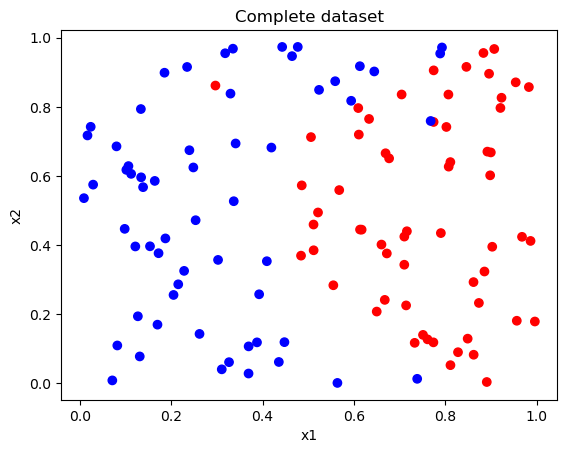

In [10]:
#nothing to do here

from sklearn.utils import shuffle
# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
X = np.hstack((np.ones((X.shape[0],1)),X))   #prepend ones for intercept

# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,-2], X[:,-1], c=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:int(X.shape[0]/2)]
X_test=X[int(X.shape[0]/2):]
y_train=y[:int(len(y)/2)]
y_test=y[int(len(y)/2):]

In [11]:
#nothing to do here - just execute the cell
w_learned,losses=fitLogRegModel(X_train, y_train)
pred_train=predictLogReg(w_learned, X_train) #as a check
pred_test=predictLogReg(w_learned, X_test)
print("The learnt weights are: w =",w_learned)

Loss after  0  iterations: 46.90015159490959
Loss after  1000  iterations: 38.63409694938098
Loss after  2000  iterations: 35.51819799170249
Loss after  3000  iterations: 33.076730815110395
Loss after  4000  iterations: 31.10418751385379
Loss after  5000  iterations: 29.49251495235071
Loss after  6000  iterations: 28.160745169898902
Loss after  7000  iterations: 27.04810385523036
Loss after  8000  iterations: 26.108871171395403
Loss after  9000  iterations: 25.30841823859209
Loss after  10000  iterations: 24.62027095803305
Loss after  11000  iterations: 24.023975782521987
Loss after  12000  iterations: 23.503557656498906
Loss after  13000  iterations: 23.04640422818841
Loss after  14000  iterations: 22.64245391393037
Loss after  15000  iterations: 22.28360030303963
Loss after  16000  iterations: 21.963251184842893
Loss after  17000  iterations: 21.67599882763627
Loss after  18000  iterations: 21.41737097055966
Loss after  19000  iterations: 21.18364090917281
Loss after  20000  iteratio

Text(0.5, 1.0, 'Test dataset - predictions')

<Figure size 640x480 with 0 Axes>

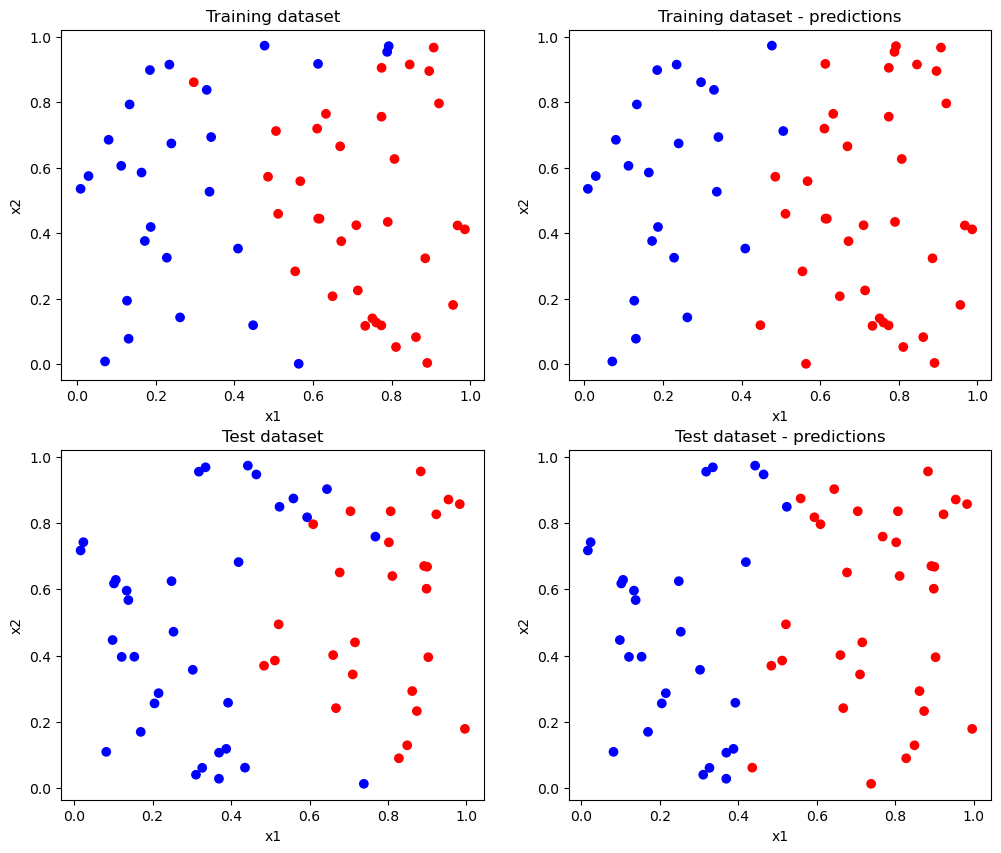

In [12]:
# Nothing to do here
# Plot training and test dataset
# Plot predictions for training and test dataset

fig = plt.figure()
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem>0.5 else 'blue' for elem in pred_train ]
plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem>0.5 else 'blue' for elem in pred_test ]
plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

In the following cell the data set `DataSet_LR_a.csv` is loaded§and split into a training set and a test set ($50\,\%$ each). Now you should:
* Classify samples as class `1` if the Logistic Regression returns values $\geq 0.5$ and `0` otherwise. Calculate  the entries for a confusion matrix and from these values the Accuracy and Balanced Accuracy in the function `calc_acc(prediction, true_values, threshold)` and apply it on the training and on the test sets.
* Provide ROC curves of the classifiers on the test samples and compute the corresponding AUC. Hint: the functions `roc_curve` and `auc` from `sklearn.metrics` might be useful. Make sure to store the calculated value for the AUC in the variable `rocAUC` - this is important for the unit-test.

<h3 style="color:rgb(208,90,80)">Code 1.8 (25 points)</h3>


In [13]:
"""
Function that calculates the prediction for one or more new samples
@param prediction, np array, predicted values
@param true_values, np array, ground truth

@output pos, float, positive samples 
@output neg, float, negative samples 
@output tp, float, true positive samples 
@output tn, float, true negative samples 
@output fp, float, false positive samples 
@output fn, float, false negative samples 
@output acc, float, accuracy
@output balanced_acc, float, balanced accuracy
"""
def calc_acc(prediction, true_values, threshold = 0.5):
    pred = np.where(prediction<threshold,0,1)
    pos = np.count_nonzero(true_values==1)
    neg = np.count_nonzero(true_values==0)
    tp = np.count_nonzero(pred[true_values ==1] == 1)
    tn = np.count_nonzero(pred[true_values ==0] == 0)
    fp = np.count_nonzero(pred[true_values ==0] == 1)
    fn = np.count_nonzero(pred[true_values ==1] == 0)

    acc = (tp+tn)/(tp+tn+fp+fn)
    balanced_acc = (tp/(tp+fn) + tn/(tn+fp))/2
        
    return pos, neg, tp, tn, fp, fn, acc, balanced_acc


In [14]:
# Calculate accuracy and balanced accuracy for test set

result_train = calc_acc(pred_train, y_train)
result_test = calc_acc(pred_test, y_test)
print(result_train[-2])
print(result_train[-1])
print(result_test[-2])
print(result_test[-1])

0.8833333333333333
0.8744343891402715
0.9
0.9117647058823529


<h3 style="color:rgb(208,90,80)">Code 1.9 (5 points)</h3>


In [15]:
fpr, tpr = roc_curve(y_test, pred_test, pos_label=1)[:2]
rocAUC = auc(fpr,tpr)
print(rocAUC)

0.9671945701357466
